# Palmer Penguins Data Analysis






---

### 'Palmer Penguins' dataset background

The data of the 'Palmer Penguins' dataset was collected from 2007 and 2009 and made available by [Dr Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) with the [Palmer Station, Antartica](https://www.nsf.gov/geo/opp/support/palmerst.jsp) which is part of the [US Long Term Ecological Research Network](https://lternet.edu/), 
Contained in the dataset is data relating to 344 penguins of 3 different species. This data was collected from 3 islands in Palmer Archipelago Antarctica.
([Source: Kaggle.com](https://www.kaggle.com/code/florianspire/palmer-penguins-data-preprocessing-and-analysis)),
([Source: Allison Horst,Alison Hill,Kristen Gorman via github](https://allisonhorst.github.io/palmerpenguins/articles/intro.html)).

The purpose of the data collection was to study the Antarctic penguins' foraging behavior and its relationship with variables in the environment. The findings were originally listed as three separate data sets - One of each species of penguin . They were then combined to one single data set which is what I will be exploring and analysing in this Jupyter notebook.([Source: UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3))




---

### Import Libraries



In [25]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


___

### Load and open the 'Palmer Penguins' data set 

In [26]:
# Load the 'Palmer Penguins' dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [27]:
#Open the 'Palmer Penguins' dataset.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
# Describe the data set
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN




In the previous two cells I have opened the data set.
Here we can see that there are several variables in our data set:
- Island 
- Species 
- Bill length
- Bill depth
- Flipper length
- Body mass
- Sex.

---

### Overview of the 'Palmer Penguin' data set 

In the previous cell I have used the 'describe()' method from pandas to return a summary of the data set.


- **count:** This description shows us the number of non-empty values for each column. We can see that the columns 'species' and 'island' have a count of 344.<br />
Columns 'bill_length_mm', 'bill_depth_mm, 'flipper_length_mm' and 'body_mass_g' have count of 342. <br />
Column 'sex' has a count of 333.<br />
As there are 344 penguins observed in this data set it appears that columns 'bill_length_mm', 'bill_depth_mm, 'flipper_length_mm' and 'body_mass_g' are missing 2 values each<br />
while column 'sex' is missing 1 value and columns 'species' and 'island' are missing no values.
<br /><br />

- **unique:** This description is only applicable here to the non numeric fields. <br />
It indicates the number of unique values in each row. <br />
'Species' and 'Island' both have 3 unique values while 'sex' has 2.
<br /><br />

- **top:** This description is only applicable here to the non numeric fields and shows the most frequent value in each column.<br />
We can see that 'Adelie' are the most frequent 'species' in the data set while 'Biscoe' is the most frequent 'island' and 'MALE' is the most frequent 'sex'
<br /><br />

- **freq:** This description tells us the frequency of the 'top' value. <br />
We can see 152 'Adelie' species penguins were observed. While 168 of the overall observations were made on the island of 'Biscoe' and of the 344 penguins 168 of them were identified as 'MALE'.
<br /><br />



- **mean:** This description is only applicable to the numeric columns. <br />
The 'mean' gives us the average value for each column.<br />
We can see the average 'bill_length_mm' is '43.921930'mm.<br />
The average bill_depth_mm is '17.151170'mm. <br />
The average flipper_length_mm is '200.915205'mm <br />
and the average 'body_mass_g'is '4201.754386'g <br />
<br /><br />

- **std** This description is only applicable to the numeric columns. <br />
'Std' gives us the standard deviation of each numeric column.<br />
This number tells us how much variation from the mean there is for this column.<br />
The standard deviation of 'bill_length_mm' is '5.459584' <br />
The standard deviation of bill_depth_mm is '1.974793' <br />
The standard deviation of flipper_length_mm is '14.061714'<br />
and the average 'body_mass_g'is '801.954536' <br />
<br /><br />


- **min** This description is only applicable to the numeric columns. <br />
'Min' gives us the minimum value for each variable.<br />
We can see that the minimum value for 'bill_length_mm' is '32.100000'mm <br />
The minimum value for bill_depth_mm is '13.100000'mm <br />
The minimum value for flipper_length_mm is '172.000000'mm<br />
and the minimum value for 'body_mass_g'is '2700.000000'g <br />
<br /><br />

- **25%** This description is only applicable to the numeric columns. <br />
'25%' gives us the 25% percentile or first quartile of each column
We can see that 25% of the results for 'bill_length_mm' are below'39.225000'mm <br />
25% of the results for 'bill_depth_mm' are below '15.600000'mm <br />
25% of the results for 'flipper_length_mm' are below '190.000000'mm<br />
25% of the results for 'body_mass_g' are below '3550.000000'g <br />
<br /><br />

- **50%** This description is only applicable to the numeric columns. <br />
'50%' gives us the 50% percentile or the median for each value.<br />
Here we can say that '44.450000'mm is the median of 'bill_length_mm' or that 50% of the values for 'bill_length_mm' are less than '44.450000'mm.<br />
The median of 'bill_depth_mm' is'17.300000'mm <br />
The median of  'flipper_length_mm' is '197.000000'mm<br />
The median of'body_mass_g' is '4050.000000'g <br />
<br /><br />


- **75%** This description is only applicable to the numeric columns. <br />
'75%' gives us the 75% percentile or third quartile of each column
We can see that 75% of the results for 'bill_length_mm' are below '48.500000'mm <br />
75% of the results for 'bill_depth_mm' are below '18.700000'mm <br />
75% of the results for 'flipper_length_mm' are below'213.000000'mm<br />
75% of the results for 'body_mass_g' are below '4750.000000'g <br />
<br /><br />




- **max** This description is only applicable to the numeric columns. <br />
'Max' gives us the maximum value for each variable.<br />
We can see that the maximum value for 'bill_length_mm' is '59.600000'mm <br />
The maximum  value for bill_depth_mm is '21.500000'mm <br />
The maximum  value for flipper_length_mm is '231.000000'mm<br />
and the maximum  value for 'body_mass_g'is '6300.000000'g <br /><br />

([Source:w3schools](https://www.w3schools.com/datascience/ds_stat_percentiles.asp))<br />
([Source:w3resource.](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php))<br />
([Source:w3schools](https://www.w3schools.com/python/pandas/ref_df_describe.asp))<br />
([Source:wikipedia](https://en.wikipedia.org/wiki/Quartile))<br />
([Source:wikipedia](https://en.wikipedia.org/wiki/Standard_deviation))<br />





---

### Variables in the Palmer Penguins Data Set

In [29]:
# Get python variable types
variable_types = df.dtypes

# Print variable types
print(variable_types)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


([Source:stackoverflow](https://stackoverflow.com/questions/51817742/how-could-i-detect-subtypes-in-pandas-object-columns))<br />

In [30]:
# Get Variable types of column 'species'

# Identify the column with the variable type 'object'
object_column = df['species']
#Get the variable type of each element in the column
variable_types = object_column.apply(type)
#Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'>]


In [31]:
# Get Variable types of column 'island'

# Identify the column with the variable type 'object'
object_column = df['island']
#Get the variable type of each element in the column
variable_types = object_column.apply(type)
#Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'>]


In [32]:
# Get Variable types of column 'sex'

# Identify the column with the variable type 'object'
object_column = df['sex']
#Get the variable type of each element in the column
variable_types = object_column.apply(type)
#Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'> <class 'float'>]


Note: The code to get the variable types of each object column was written with the assistance of chat GPT

In [33]:


# Check unique values in the "sex" column to understand why 'float' is a variable type
unique_sex_values = df['sex'].unique()

# Print unique values
print(unique_sex_values)

# The value 'nan' has been used to represent missing data. This is why 'float' is returning as a variable type.


['MALE' 'FEMALE' nan]


([Source:geeksforgeeks.org](https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/))<br />

### Variables types in the Palmer Penguins data set - Python Perspective

In the above cells I have used Pandas commands to investigate the variable types in the context of Python. <br /><br />

**Float Variables**<br />
These variable types are comprised of floating point numbers.<br />
- bill_length_mm
- bill_depth_mm 
- flipper_length_mm
- body_mass_g <br /><br />


**String Variables**<br />
These variable types are made up of a collection or 'string' of characters.<br />
- species
- island
<br /><br />

**Variables that contain string and float values**

- sex<br /><br />

In the context of modeling the data in this set I will treat the variable 'sex' as a string as the 'float' categorisation comes from a singular missing value which we may remove or replace later in the data analysis when we clean up the data.<br /><br />


([w3schools](https://www.w3schools.com/go/go_float_data_type.php#:~:text=The%20float%20data%20types%20are,%2C%20%2D2.34%2C%20or%203597.34987.))<br />
 ([programiz.com](https://www.programiz.com/python-programming/string#google_vignette))<br />


***

### Variables types in the Palmer Penguins data set - Data Analytics Perspective

From a data analysis theory point of view the variables in the Palmer Penguins data set can be categorised into two main types.<br />
'Numerical' (Also known as Quantitative) and 'Categorical' (also known as Qualitive).<br /><br />

**Numerical Variables**
Are numerical and represent amounts. <br />
The numerical variables in our data set are
- bill_length_mm
- ill_depth_mm 
- flipper_length_mm
- body_mass_g 
<br /><br />

**Numerical Variables** can be categorised as either **'Continuous'** or **'Discrete'**.<br /><br />
 
**'Continuous' variables** contain values that are numbers which can have a decimal place.<br />
A variable can be said to be continuous if it 'can assume an infinite number of real values within a given interval'([(Source:statcan](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm))<br />
For example: The 'Bill length' of the penguins surveyed in this data set are a minimum length of 32.100000mm and a  maximum length of 59.600000mm <br />
Between these values the number of possible bill lengths is infinite.<br /><br />

**'Discrete' variables** must be whole integer values.<br />
Discrete variables contain values which are  'distinct, countable values'([Source:outlier](https://articles.outlier.org/discrete-vs-continuous-variables#section-what-is-a-discrete-variable))<br />
For example: If this data set had a variable for 'Number of Penguins' it would be categorised as a discrete variable as the amount of penguins must be distinct,countable and cannot be a decimal value. <br /><br />

In this data set all of our quantitative variables are continuous.<br /><br />

**Categorical Variables**
Are variables that represent groupings or categories and refer to characteristics that cannot be quantified.<br />
The Categorical Variables in this data set are
- Island 
- Species 
- Sex.
<br /><br />

**Categorical Variables** can be 'Ordinal', 'Nominal' or 'Binary'.<br />
'Ordinal' variables have values which can be defined or ranked by an order.<br />
For example: a survey may have the possible responses of 'bad','good' or 'very good'. 'Very good' will rank above 'good' which will in turn rank ahead of 'bad'<br /><br />
**'Nominal' variables** contain values that do not have a natural order <br />
For example: the variable 'species' in our data set. Adelie,Biscoe and Gentoo have no natural order or rank.<br /> 
**'Binary variables** are variables that contain only 2 possible outcomes<br />
For example in the context of this specific data set the variable 'sex' could be modeled as a binary variable as 'male' and 'female' are the only two possible outcomes.<br />
However it could also be modeled as a nominal category as it contains groupings with no natural order.<br /><br />

The remaining categorical variables 'Island' and 'Species' are nominal variables.<br /><br />


([Source:codecademy](https://www.codecademy.com/learn/dsf-exploratory-data-analysis-python/modules/dsf-variable-types-for-data-science/cheatsheet))<br />
([Source:statcan](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm))<br />
([Source:outlier](https://articles.outlier.org/discrete-vs-continuous-variables#section-what-is-a-discrete-variable))<br />
([Source:PennState Eberly College of Science](https://online.stat.psu.edu/stat500/lesson/3/3.2/3.2.2#:~:text=A%20binary%20variable%20is%20a,of%20a%20binary%20categorical%20variable.))<br />


### Variable Types in Summary <br />
Based on my above analysis of the variable types in relation to the variables in this data set i would suggest categorising each variable as so: <br />



| Variable | Python Variable type| Data Analytics Variable type |
|:-------------|:--------------:|--------------:|
| Species    |    String  |       Categorical ,Nominal|
| Island     |    String   |       Categorical ,Nominal    |
| bill_length_mm    |    Float  |       Numerical ,Continuous   |
| bill_depth_mm      |     Float  |       Numerical ,Continuous   |
| flipper_length_mm      |    Float  |       Numerical ,Continuous   |
| body_mass_g     |       Float  |       Numerical ,Continuous  |
| sex     |    String  |       Categorical,Binary  ,Nominal|

***

### 'Island' Variable visualised as a bar chart

In [34]:
#Get the value counts for 'Island'
island_count=df['island'].value_counts()

Text(0, 0.5, 'Count of Penguins')

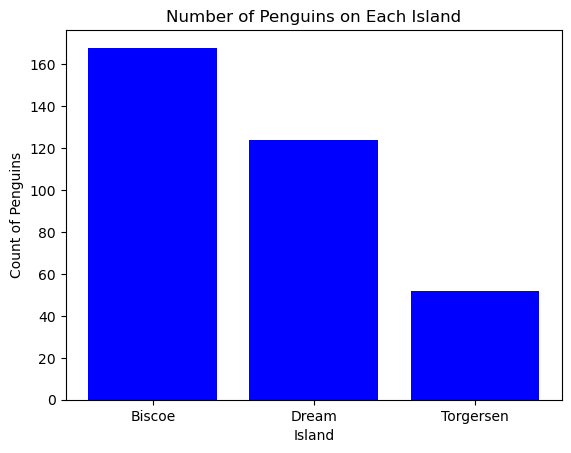

In [35]:
#Plotting the bar chart for the amount of penguins on each island.


plt.bar(island_count.index, island_count.values, color='blue')
plt.title('Number of Penguins on Each Island')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')


From this barchart we can visualise the amount of penguins per island.<br/>
Here we can see that the majority of observations were made on the island of Biscoe <br/>
While less than 60 were made on the island of Torgersen

---

### 'Flipper' variable visualised as a histogram

In [36]:
#Get the value counts for 'Flipper Length (mm)'
island_count=df['flipper_length_mm'].value_counts()

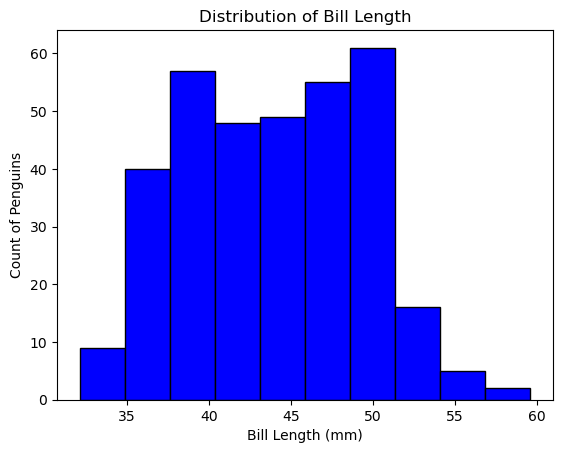

In [37]:
# Plot a histogram for the distribution of Bill length.
plt.hist(df['bill_length_mm'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Count of Penguins')
plt.show()


From this histogram we can observe the distribution of bill lengths among the penguins.<br/>
We can observe that the majority of penguins have a bill lenth beetween 35mm and just over 50mm <br/>
With a small number of outliers either side.

***

### Correlation between two variables.

To provide an analysis is of two of the variables in the Palmers Penguins data set first I will investigate the correlation between all numeric variables<br/>
Before I calculate the correlation I will look at the quality of the data and what is missing. <br/><br/>

First lets find what columns are missing data:

In [38]:
# Check for missing values
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


([Source:cmdlinetips.com](https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/))

As we can see 5 of our columns are missing values.<br/>
I will focus on the numeric fields for the purpose of correlation.<br/>
bill_length, bill_depth_mm, flipper_lenth_mm and body_mass_g are all missing two values each.<br/>
I have three options here <br/>
I Could replace the two missing values of each column by using mean or median imputation,<br/>
I could drop the missing values<br/>
or i could leave the null values in the data set .<br/>
As the missing values represent less than 2% of all observations in each column it will have little impact on the correlations using these variables.<br/>
See below the correlation matrix of the cleaned data frame and the origional data frame.<br/>


([Source:tEugenio "Jay" Zuccarelli](https://towardsdatascience.com/the-dos-and-donts-of-imputation-d89d72a26a58))

In [39]:
#Remove 'NaN' values from the data set 

df_cleaned = df.dropna()


([Source: w3schools](https://www.w3schools.com/python/pandas/ref_df_dropna.asp))

### Cleaned data frame correlation matrix:

In [40]:

#Create a data frame from the cleaned data set of just the numeric columns.
numeric_df_cleaned = df_cleaned.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix_cleaned = numeric_df_cleaned.corr()

#Show the correlation matrix
(correlation_matrix_cleaned)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


---

###  Original data frame correlation matrix:

In [41]:

#Create a data frame from the cleaned data set of just the numeric columns.
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

#Show the correlation matrix
(correlation_matrix)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


([Source: statology.org](https://www.statology.org/correlation-in-python/))<br/>
([Source:geeksforgeeks.org](https://www.geeksforgeeks.org/how-to-create-a-correlation-matrix-using-pandas/))<br/>

---

I will continue on with the analysis based on the original data frame. <br/>
Below I have visualised the numeric variables and the correlations as a heatmap. <br/>

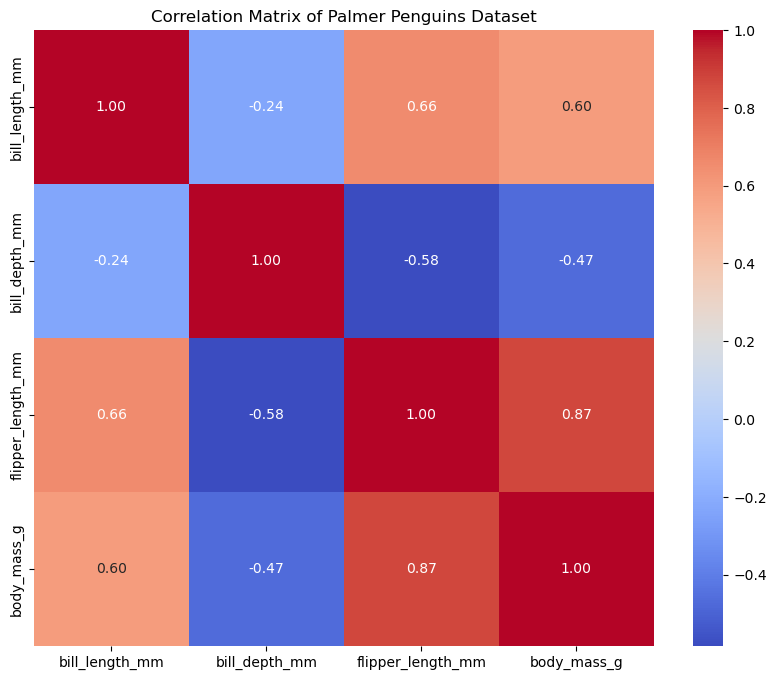

In [42]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Palmer Penguins Dataset')
plt.show()

([Source:Joleen Bothma/datacamp.com ](https://www.datacamp.com/tutorial/seaborn-heatmaps))<br/>
([Source:Bibor Szabo ](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e))<br/>

We can see from the above martix and heatmap that flipper length and body mass are the highest correlated set of variables.<br/>
While bill depth and flipper length are the least correlated set of variables.<br/><br/>
As flipper length and body mass are the most correlated of the variables I will chose these to dive further into. <br/>
I will visualise the correlation of these two variables with a scatter plot. 

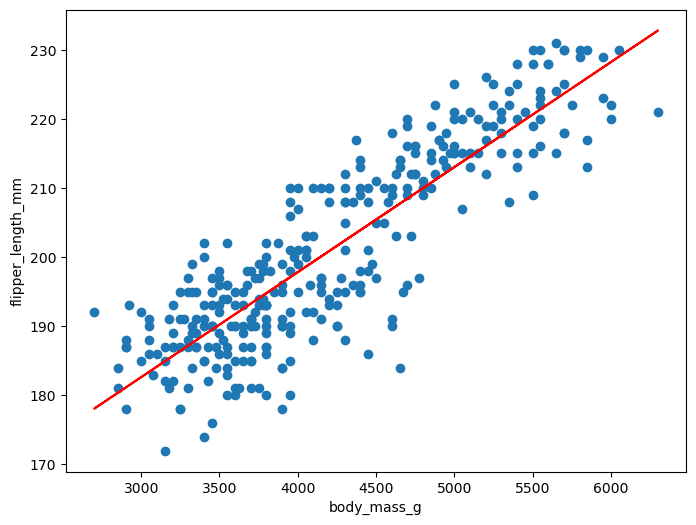

In [43]:
#Set the variables for the scatter plot
x_variable = 'body_mass_g'
y_variable = 'flipper_length_mm'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_variable], df_cleaned[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)

#Get m (slope) and b(intercept) of the linear regression line
m, b = np.polyfit(df_cleaned[x_variable], df_cleaned[y_variable], 1)

#Add the linear regression line to the scatter plot
plt.plot(df_cleaned[x_variable], m*df_cleaned[x_variable]+b,color='red')

#Show graph
plt.show()

([Source:machinelearningplus.com ](https://www.machinelearningplus.com/plots/python-scatter-plot/))<br/>
([Source:statology.org ](https://www.statology.org/scatterplot-with-regression-line-python/))<br/>

With a correlation coefficient of 1 being a perfect positive correlation we can observe that with a correlation coeffecient of 0.871202 the variables flipper_length_mm and body_mass_g have a positive relationship. <br/>
We can clearly see this highlighted in the scatter plot. The data trends upward from left to right in a linier fashion.<br/>
This tell us that as body mass increases so does flipper length.<br/>


([Source:Statistics By Jim](https://statisticsbyjim.com/basics/correlations/#:~:text=Correlation%20Coefficient%20%3D%200.8%3A%20A%20fairly,change%20in%20a%20specific%20direction.))<br/><br/><br/>

Others who have studied the correlation between these two variables have drawn the same conclusion: <br/>
Including ([Alison Hill, Allison Horst, Kristen Gorman](https://rpubs.com/shahworld/scatter)) themselves who used 'R' in their example.<br/><br/>

See others:<br/>
([Jingyi Fang](https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda))<br/>
([Taylor via RPubs using R ](https://rpubs.com/TEHoule/PalmerPenguinPlayground))<br/>
([Shah Nawaz via RPubs using R ](https://rpubs.com/shahworld/scatter))<br/>


As a further investigation I will look at the correlation between flipper length and body mass and how the data breaks down between the three species of penguin. <br/>

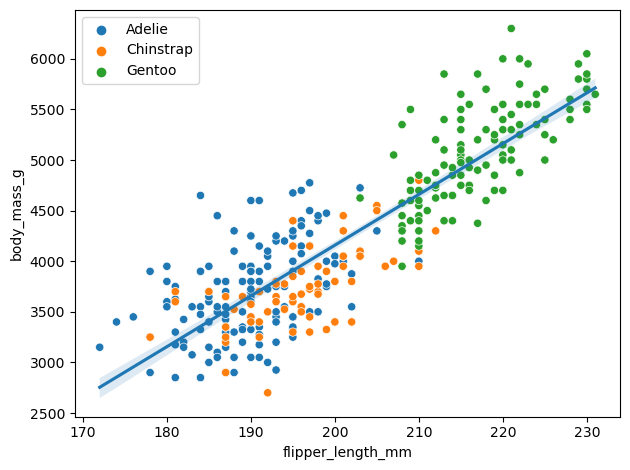

In [44]:

# Create the scatter plot and set variables.
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df_cleaned)

#Add a regression line to the scatter plot
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=df_cleaned, scatter=False)

# Format the legend
plt.legend(loc='upper left')

# Manually adjust the layout
plt.tight_layout()

plt.show()

([Source:ALEX LABUDA/Kaggle  ](https://www.kaggle.com/code/alabuda/classification-and-eda-palmer-penguins))<br/>
([Source:stackoverflow.com  ](https://www.kaggle.com/code/alabuda/classification-and-eda-palmer-penguins))



From the above scatter plot the following observations can be made <br/>
- Gentoo as a species are the largest of the penguins observed in both body mass and flipper length. <br/>
- The penguins with the shortest flipper length belong to the Adelie species.<br/>
- The penguin with the lowest body weight belongs to the Chinstrap species. But as a species Adelie generally seem to have the lowest body weight of the penguins observed<br/>




# Conclusion:

- In this data set there is a positive correlation between the flipper length and bosy mass of the penguins <br/>
- Although it is important to remember that positive correlation does not imply causation, in the case of these specific variables it does make sense that a penguin with longer flippers would have a heavier body mass and visa versa. <br/>
- We can see in the scatter plots that there are some outliers that deviate from the line this could be accounted for in a few different ways: <br/><br>
- The data in this data set was collected over two years. A penguins weight can fluxuate depending on a number of factors: Moulting, Mating, time of year ,availability of food etc. ([Source:Wikipedia ](https://en.wikipedia.org/wiki/Chinstrap_penguin),[Source:Wikipedia ](https://en.wikipedia.org/wiki/Gentoo_penguin))
- We do not know the ages of the penguins in the data set. Considering there may be juvanile penguins included what stage they are in development may lead to an outlier flipper length to body mass ratio. 


